# Visualization of radiation of an AGN

In [1]:
from Photon_Ionization import *

In [2]:
distance = np.array([1,2,4,8])
dic = {'alpha':0.1, 'beta':100, 'mdot':3}
col1 = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
col2 = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']
col3 = ['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f']
col1.reverse()
col2.reverse()
col3.reverse()

In [3]:
Dat = compare(distance, dic)

- Compare the **total fluxes** and **ionization rates** (both primary and secondary)
- $J_{X21}=1$

In [4]:
for i in Dat:
    i.intro()
    print('distance =', i.distance_kpc, 'kpc')
    print('\nTotal Flux:')
    print(inte(i.nu, i.Fnu, lower = 130*1.6021773e-12/h, upper = 6e5*1.6021773e-12/h))
    print(inte(i.nu, i.Fnu_abs, lower = 130*1.6021773e-12/h, upper = 6e5*1.6021773e-12/h))
    print('\nIonization Rate:')
    test(H, He, i)
    print('****************************')
    
print('Standard ionization rate (JX21=0.1) ')
E = np.linspace(1.3e2, 6e8)
print('Total Flux:')
print(quad(lambda epsilon:J21*1e-21*np.power(epsilon/1000.0,-1.5)*4*np.pi/h_eV, 130, 6e5)[0])
print(quad(lambda epsilon:J21*1e-21*np.power(epsilon/1000.0,-1.5)*np.exp(-Tau(epsilon, H, He))*4*np.pi/h_eV, 130, 6e5)[0])
print('\nIonization Rate:')
test(H, He)

************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 8.0 kpc

Total Flux:
0.013579868788196007
0.0008975722423550573

Ionization Rate:
H -19.576323816282414 -18.874201735430944 -16.86188201385597
He -18.093961739122147 -17.72672978182099 -16.93818363625111
****************************
************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 4.0 kpc

Total Flux:
0.05431947515278403
0.005236549278356395

Ionization Rate:
H -18.285397580765096 -17.585673841469582 -15.5739445483516
He -16.80702082687574 -16.43922317654312 -15.650321109820867
****************************
************************
alpha =  0.1
beta =  100
mdot =  3.0
************************
distance = 2.0 kpc

Total Flux:
0.2172779006111361
0.04827503441311665

Ionization Rate:
H -17.135718310056728 -16.43828596054142 -14.427124577022552
He -15.661162846275706 -15.29281859003656 -14.503573327817012
****************************
*************

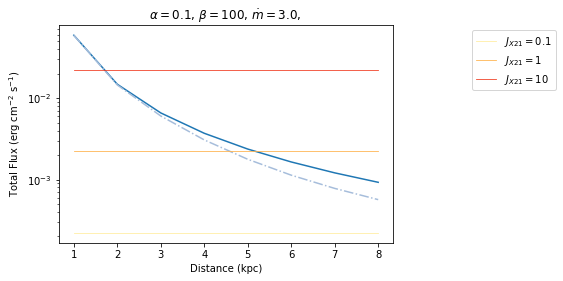

In [5]:
Dat2 = compare(np.arange(8)+1, dic)
ip, ip_abs = np.array([]), np.array([])
for i in Dat2:
    ip = np.append(inte(i.nu, i.Fnu, lower = 2000*1.6021773e-12/h, upper = 10000*1.6021773e-12/h), ip)
    ip_abs = np.append(inte(i.nu, i.Fnu_abs, lower = 2000*1.6021773e-12/h, upper = 10000*1.6021773e-12/h), ip_abs)
plt.plot(np.arange(8)+1, ip)
plt.plot(np.arange(8)+1, ip_abs, '-.', color = '#a6bddb')
ip_model = quad(lambda epsilon:1e-21*np.power(epsilon/1000.0,-1.5)*np.exp(-Tau(epsilon, H, He))*4*np.pi/h_eV, 2000, 10000)[0]

plt.plot([1,8], [ip_model/10, ip_model/10], label = '$J_{X21}=0.1$', color = '#ffeda0', lw = 0.8)
plt.plot([1,8], [ip_model, ip_model], label = '$J_{X21}=1$', color = '#feb24c', lw = 0.8)
plt.plot([1,8], [ip_model*10, ip_model*10], label = '$J_{X21}=10$', color = '#f03b20', lw = 0.8)

plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Total Flux (erg cm$^{-2}$ s$^{-1}$)')
plt.legend(bbox_to_anchor=(1.5,1))
plt.title(Dat2[0].title(distance = False, alpha = True, beta = True, mdot = True))
plt.show()

## Ionization rates of H and He

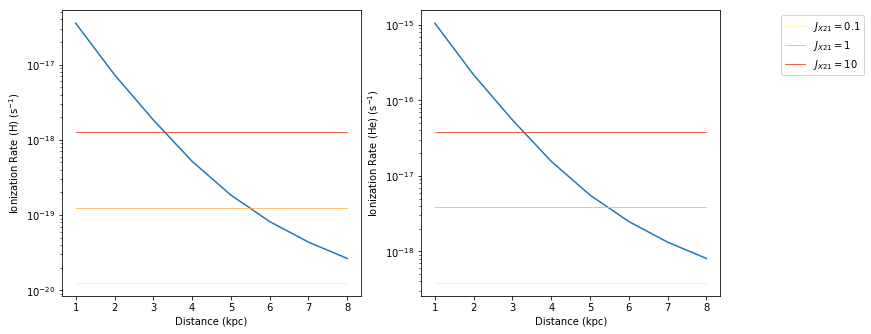

In [6]:
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize = (12,4.5))
plt.subplot(121)
plt.plot(np.arange(8)+1, ip_H)

ip_model_H = Ion_p(H, He, H)
plt.plot([1,8], [ip_model_H/10, ip_model_H/10], label = '$J_{X21}=0.1$', color = '#ffeda0', lw = 0.8)
plt.plot([1,8], [ip_model_H, ip_model_H], label = '$J_{X21}=1$', color = '#feb24c', lw = 0.8)
plt.plot([1,8], [ip_model_H*10, ip_model_H*10], label = '$J_{X21}=10$', color = '#f03b20', lw = 0.8)
plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (H) (s$^{-1}$)')
#plt.legend(bbox_to_anchor=(1.5,1))
#plt.title(Dat2[0].title(distance = False, alpha = True, beta = True, mdot = True))

plt.subplot(122)
plt.plot(np.arange(8)+1, ip_He)

ip_model_He = Ion_p(H, He, He)
plt.plot([1,8], [ip_model_He/10, ip_model_He/10], label = '$J_{X21}=0.1$', color = '#ffeda0', lw = 0.8)
plt.plot([1,8], [ip_model_He, ip_model_He], label = '$J_{X21}=1$', color = '#feb24c', lw = 0.8)
plt.plot([1,8], [ip_model_He*10, ip_model_He*10], label = '$J_{X21}=10$', color = '#f03b20', lw = 0.8)
plt.yscale('log')
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (He) (s$^{-1}$)')
plt.legend(bbox_to_anchor=(1.5,1))
#plt.title(Dat2[0].title(distance = False, alpha = True, beta = True, mdot = True))
plt.tight_layout(0.2)
plt.show()

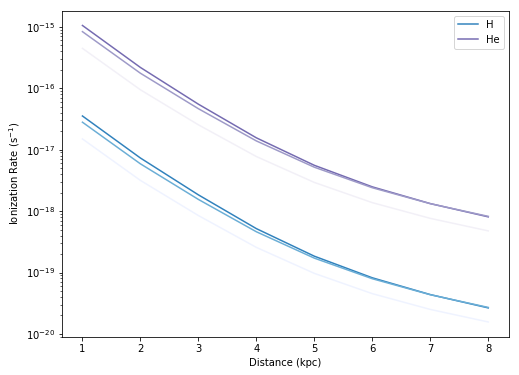

In [7]:
dic = {'alpha':0.1, 'beta':100, 'mdot':3}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize = (8,6))
plt.plot(np.arange(8)+1, ip_H, label='H', color = col1[1])
plt.plot(np.arange(8)+1, ip_He, label='He', color = col3[1])

dic = {'alpha':0.1, 'beta':100, 'mdot':1}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8)+1, ip_H, color = col1[2])
plt.plot(np.arange(8)+1, ip_He, color = col3[2])

dic = {'alpha':0.1, 'beta':100, 'mdot':0.5}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8)+1, ip_H, color = col1[4])
plt.plot(np.arange(8)+1, ip_He, color = col3[4])
plt.yscale('log')
plt.legend()
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (s$^{-1}$)')
plt.show()

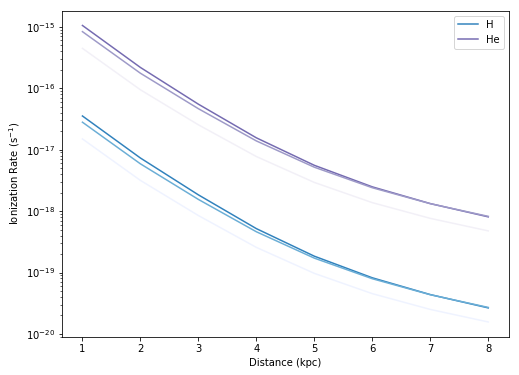

In [8]:
dic = {'alpha':0.1, 'beta':100, 'mdot':3}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.figure(figsize = (8,6))
plt.plot(np.arange(8)+1, ip_H, label='H', color = col1[1])
plt.plot(np.arange(8)+1, ip_He, label='He', color = col3[1])

dic = {'alpha':0.1, 'beta':100, 'mdot':1}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8)+1, ip_H, color = col1[2])
plt.plot(np.arange(8)+1, ip_He, color = col3[2])

dic = {'alpha':0.1, 'beta':100, 'mdot':0.5}
Dat2 = compare(np.arange(8)+1, dic)
ip_H, ip_He = np.array([]), np.array([])
for i in Dat2:
    ip_H = np.append(Ion_p(H, He, H, i), ip_H)
    ip_He = np.append(Ion_p(H, He, He, i), ip_He)
plt.plot(np.arange(8)+1, ip_H, color = col1[4])
plt.plot(np.arange(8)+1, ip_He, color = col3[4])
plt.yscale('log')
plt.legend()
plt.xlabel('Distance (kpc)')
plt.ylabel('Ionization Rate (s$^{-1}$)')
plt.show()

## Plot $F_\nu-\nu$
- $\alpha=0.1, \beta=100, \dot m=3$
- Blue line is a standard model which obeys a power law
- Orange lines are fluxes in different distances from the SMBH
- Each dash line is the flux which have gone through the absorption both in galactic disk and in the molecular cloud

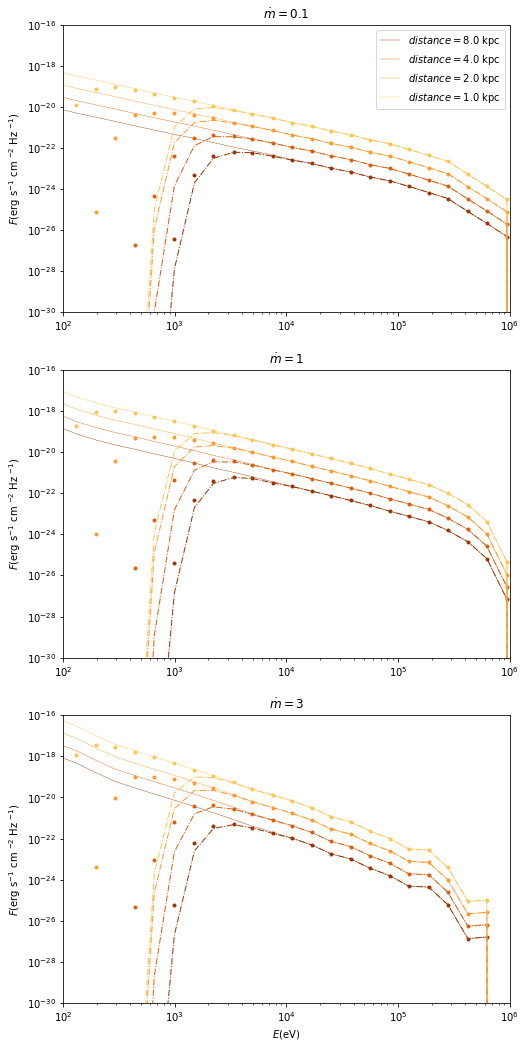

In [10]:
plt.figure(figsize=(8, 18))
c = 0
plt.subplot(311)
Dat = compare([1,2,4,8], dic = {'alpha':0.1, 'beta':100, 'mdot':0.1})
for i in Dat:
    draw_Fnu(i, col3[c], col2[c], col2[c], absorb = True)
    #draw_Fnu_model()
    c += 1
c = 0
plt.ylim([1e-30,1e-16])
plt.xlabel('')
plt.title(r'$\dot m=0.1$')
plt.legend()
plt.subplot(312)
Dat = compare([1,2,4,8], dic = {'alpha':0.1, 'beta':100, 'mdot':1})
for i in Dat:
    draw_Fnu(i, col3[c], col2[c], col2[c], absorb = True)
    #draw_Fnu_model()
    c += 1
c = 0
plt.ylim([1e-30,1e-16])
plt.xlabel('')
plt.title(r'$\dot m=1$')
plt.subplot(313)
Dat = compare([1,2,4,8], dic = {'alpha':0.1, 'beta':100, 'mdot':3})
for i in Dat:
    draw_Fnu(i, col3[c], col2[c], col2[c], absorb = True)
    #draw_Fnu_model()
    c += 1
plt.ylim([1e-30,1e-16])
plt.title(r'$\dot m=3$')
plt.savefig('2_2_1_1.eps')

## Plot $\nu F_\nu-\nu$

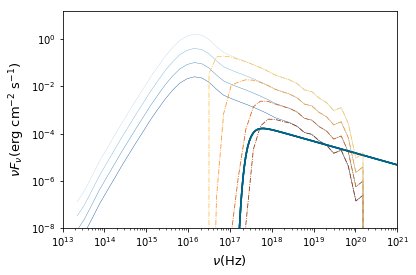

In [14]:
c = 0
for i in Dat:
    draw_nuF(i, col1[c], col2[c])
    draw_nuF_model()
    c += 1
#plt.legend(bbox_to_anchor=(1.5,1))
#plt.savefig('1.eps')
plt.show()

## Plot $\nu L_\nu-\nu$

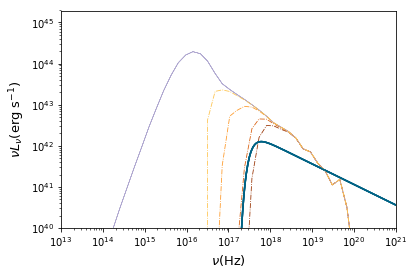

In [11]:
c = 0
for i in Dat:
    draw_nuL(i, col3[c], col2[c])
    draw_nuL_model()
    c += 1
#plt.legend(bbox_to_anchor=(1.5,1))
plt.show()